# CLEANING THE DATA

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/finalproject/collection_process/hospital_data_with_external_factors.csv')

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\192421259.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/finalproject/collection_process/hospital_data_with_external_factors.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   triage_code               143280 non-null  int64  
 1   PatientCode               143280 non-null  int64  
 2   DischargeFromED           143280 non-null  int64  
 3   Foreigners                143280 non-null  object 
 4   gender                    143279 non-null  object 
 5   age                       143279 non-null  float64
 6   marital_Status            143261 non-null  float64
 7   ResidentDate_year         143280 non-null  int64  
 8   ResidentDate_month        143280 non-null  int64  
 9   ResidentDate_day          143280 non-null  int64  
 10  ResidentDate_weekday      143280 non-null  int64  
 11  ResidentDate_hour         143280 non-null  int64  
 12  DischargeDate_year        143280 non-null  int64  
 13  DischargeDate_month       143280 non-null  i

In [4]:
df.nunique()

triage_code                 143224
PatientCode                 143280
DischargeFromED                  2
Foreigners                       2
gender                           2
age                            111
marital_Status                   6
ResidentDate_year                6
ResidentDate_month              12
ResidentDate_day                31
ResidentDate_weekday             7
ResidentDate_hour               24
DischargeDate_year               6
DischargeDate_month             12
DischargeDate_day               31
DischargeDate_weekday            7
DischargeDate_hour               1
StatusOnDischarge               11
KindRef                          7
IsGlobal                         2
AccompainerRelation_id          10
ResidentDay                    177
service_count_action             1
service_count_instrument         1
service_count_lab                1
service_count_graphy             1
ResidentDate                  1819
temperature_max                147
temperature_min     

# CORRELATION MAP FOR THE DATASET

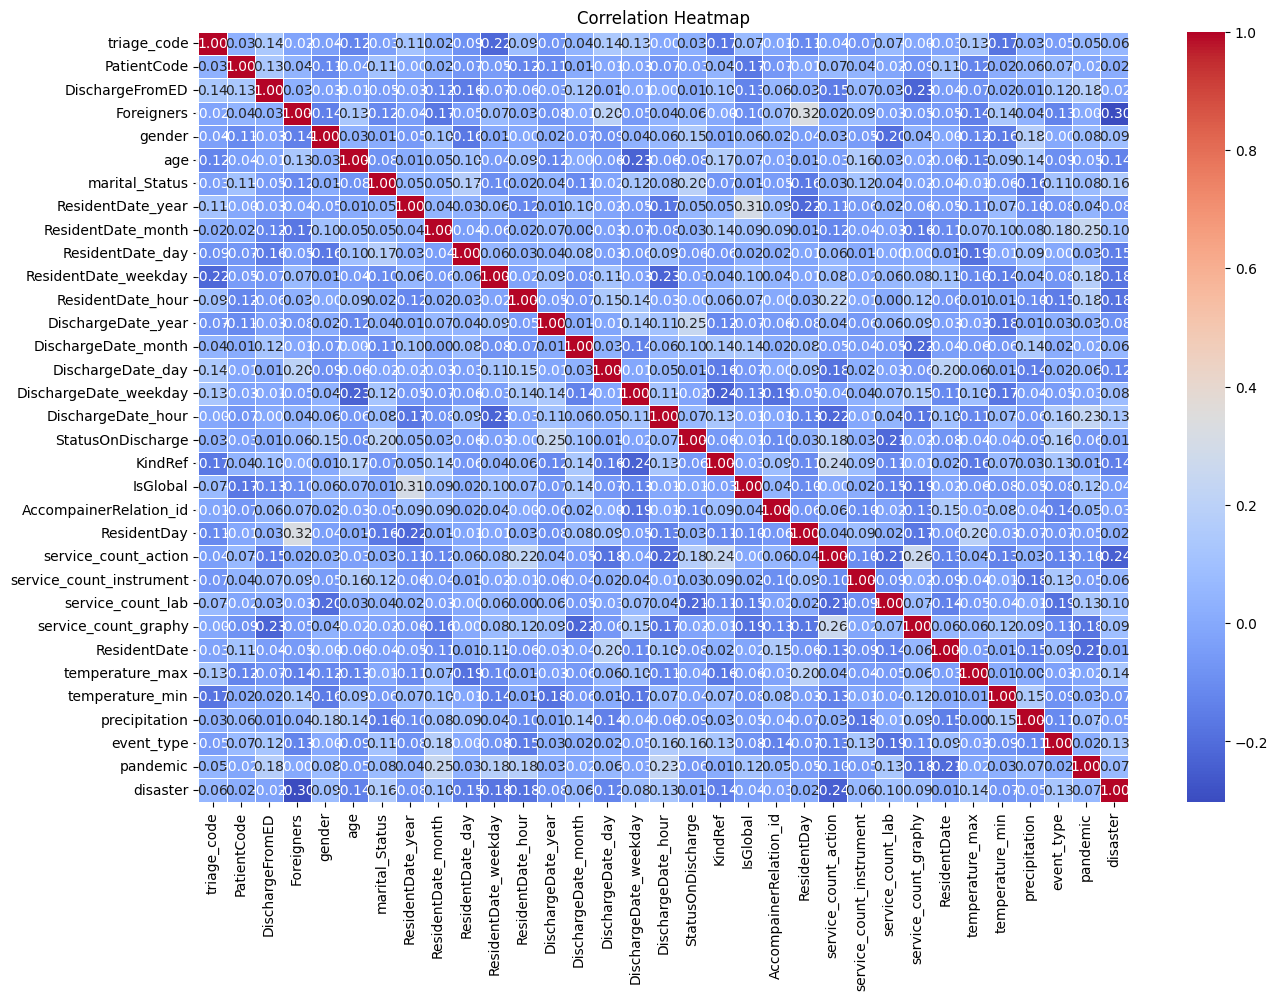

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical features
numerical_features = ["triage_code", "PatientCode", "DischargeFromED", "Foreigners", "gender", "age", "marital_Status", 
                      "ResidentDate_year", "ResidentDate_month", "ResidentDate_day", "ResidentDate_weekday", 
                      "ResidentDate_hour", "DischargeDate_year", "DischargeDate_month", "DischargeDate_day", 
                      "DischargeDate_weekday", "DischargeDate_hour", "StatusOnDischarge", "KindRef", "IsGlobal", 
                      "AccompainerRelation_id", "ResidentDay", "service_count_action", "service_count_instrument", 
                      "service_count_lab", "service_count_graphy", "ResidentDate", "temperature_max", 
                      "temperature_min", "precipitation", "event_type", "pandemic", "disaster"]

# Create a sample DataFrame with random data for demonstration
np.random.seed(0)
data = pd.DataFrame(np.random.rand(100, len(numerical_features)), columns=numerical_features)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# DELETING THE UNWANTED COLOMNS

In [6]:
df.drop(columns=['triage_code', 'PatientCode'], inplace=True)


In [7]:
df.drop(columns=[
    'service_count_action',
    'service_count_instrument',
    'service_count_lab',
    'service_count_graphy'
], inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DischargeFromED         143280 non-null  int64  
 1   Foreigners              143280 non-null  object 
 2   gender                  143279 non-null  object 
 3   age                     143279 non-null  float64
 4   marital_Status          143261 non-null  float64
 5   ResidentDate_year       143280 non-null  int64  
 6   ResidentDate_month      143280 non-null  int64  
 7   ResidentDate_day        143280 non-null  int64  
 8   ResidentDate_weekday    143280 non-null  int64  
 9   ResidentDate_hour       143280 non-null  int64  
 10  DischargeDate_year      143280 non-null  int64  
 11  DischargeDate_month     143280 non-null  int64  
 12  DischargeDate_day       143280 non-null  int64  
 13  DischargeDate_weekday   143280 non-null  int64  
 14  DischargeDate_hour  

In [9]:
for col in df.columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaNs



Value counts for column: DischargeFromED
DischargeFromED
1    72356
0    70924
Name: count, dtype: int64

Value counts for column: Foreigners
Foreigners
No     138092
Yes      5188
Name: count, dtype: int64

Value counts for column: gender
gender
Male      89004
Female    54275
NaN           1
Name: count, dtype: int64

Value counts for column: age
age
30.0     2529
35.0     2498
32.0     2374
33.0     2328
34.0     2328
         ... 
111.0       1
NaN         1
108.0       1
104.0       1
106.0       1
Name: count, Length: 112, dtype: int64

Value counts for column: marital_Status
marital_Status
2.0    98090
1.0    42279
4.0     2493
3.0      330
0.0       37
5.0       32
NaN       19
Name: count, dtype: int64

Value counts for column: ResidentDate_year
ResidentDate_year
2019    32572
2018    29060
2021    25852
2017    25617
2020    24281
2022     5898
Name: count, dtype: int64

Value counts for column: ResidentDate_month
ResidentDate_month
7     14226
8     13492
6     12912
5     

# CLEANING THE NULL VALUES

In [10]:
df.drop(columns=['DischargeDate_hour','IsGlobal'], inplace=True)

In [11]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\3191725845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)


In [12]:
df['age'].fillna(df['age'].median(), inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\2143548018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [13]:
df['marital_Status'].fillna(df['marital_Status'].mode()[0], inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\1225764273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital_Status'].fillna(df['marital_Status'].mode()[0], inplace=True)


In [14]:
df['AccompainerRelation_id'].fillna(df['AccompainerRelation_id'].mode()[0], inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\3234197213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AccompainerRelation_id'].fillna(df['AccompainerRelation_id'].mode()[0], inplace=True)


In [15]:
df['ResidentDay'].fillna(df['ResidentDay'].median(), inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\2262656001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ResidentDay'].fillna(df['ResidentDay'].median(), inplace=True)


In [16]:
df['event_type'].fillna('No Event', inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\1565778394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['event_type'].fillna('No Event', inplace=True)


In [17]:
df['pandemic'].fillna('None', inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\3711227273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pandemic'].fillna('None', inplace=True)


In [18]:
df['disaster'].fillna('None', inplace=True)


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10288\714617741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['disaster'].fillna('None', inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DischargeFromED         143280 non-null  int64  
 1   Foreigners              143280 non-null  object 
 2   gender                  143280 non-null  object 
 3   age                     143280 non-null  float64
 4   marital_Status          143280 non-null  float64
 5   ResidentDate_year       143280 non-null  int64  
 6   ResidentDate_month      143280 non-null  int64  
 7   ResidentDate_day        143280 non-null  int64  
 8   ResidentDate_weekday    143280 non-null  int64  
 9   ResidentDate_hour       143280 non-null  int64  
 10  DischargeDate_year      143280 non-null  int64  
 11  DischargeDate_month     143280 non-null  int64  
 12  DischargeDate_day       143280 non-null  int64  
 13  DischargeDate_weekday   143280 non-null  int64  
 14  StatusOnDischarge   

In [20]:
for col in df.columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaNs



Value counts for column: DischargeFromED
DischargeFromED
1    72356
0    70924
Name: count, dtype: int64

Value counts for column: Foreigners
Foreigners
No     138092
Yes      5188
Name: count, dtype: int64

Value counts for column: gender
gender
Male      89005
Female    54275
Name: count, dtype: int64

Value counts for column: age
age
30.0     2529
35.0     2498
32.0     2374
33.0     2328
34.0     2328
         ... 
105.0       2
111.0       1
108.0       1
104.0       1
106.0       1
Name: count, Length: 111, dtype: int64

Value counts for column: marital_Status
marital_Status
2.0    98109
1.0    42279
4.0     2493
3.0      330
0.0       37
5.0       32
Name: count, dtype: int64

Value counts for column: ResidentDate_year
ResidentDate_year
2019    32572
2018    29060
2021    25852
2017    25617
2020    24281
2022     5898
Name: count, dtype: int64

Value counts for column: ResidentDate_month
ResidentDate_month
7     14226
8     13492
6     12912
5     12454
3     12392
4     11997

# CORRELATION MAP AFTER CLEANING THE DATA

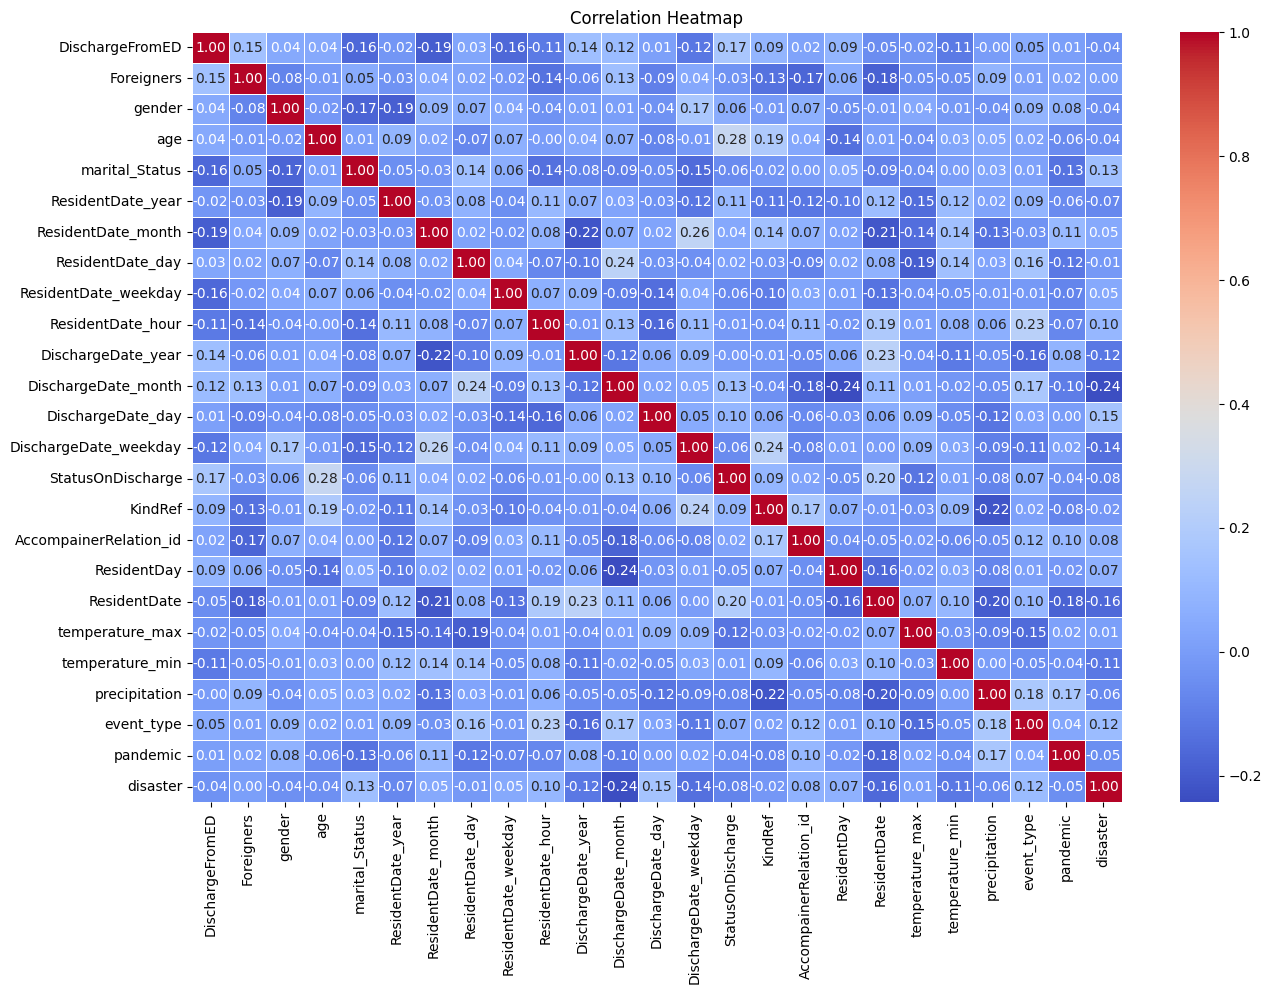

In [21]:
# Select numerical features
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the numerical features
numerical_features = ["DischargeFromED", "Foreigners", "gender", "age", "marital_Status", "ResidentDate_year", "ResidentDate_month", "ResidentDate_day", "ResidentDate_weekday", "ResidentDate_hour", "DischargeDate_year", "DischargeDate_month", "DischargeDate_day", "DischargeDate_weekday", "StatusOnDischarge", "KindRef", "AccompainerRelation_id", "ResidentDay", "ResidentDate", "temperature_max", "temperature_min", "precipitation", "event_type", "pandemic", "disaster"]

# Create a sample DataFrame with random data for demonstration
np.random.seed(0)
data = pd.DataFrame(np.random.rand(100, len(numerical_features)), columns=numerical_features)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [22]:
df.to_csv('/finalproject/cleaning_process/hospital_data_cleaned.csv', index=False) 